In [1]:
import nltk
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
import re
df=pd.read_excel(r"C:\Users\Ameena Thabusam\Downloads\sentiment_reviews.xlsx")

In [3]:
df

,platform,reviewText,Sentiment_Category
0,YouTube,Wear,Neutral
1,Reddit,Got for school pics. Nice color. Good quality....,Positive
2,Twitter,Good quality. A bit bigger than expected.,Positive
3,YouTube,The product does not meet the criteria for hig...,Negative
4,Reddit,NaN,Neutral
...,...,...,...
8995,Reddit,Well school started 7 my 6 yr old grandson nee...,Negative
8996,Twitter,Cannot go wrong with da Ralph.,Negative
8997,YouTube,The underwear in made well. The only complaint...,Negative
8998,Reddit,Love these shirts so I bought a second. Comfor...,Positive


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   platform            9000 non-null   object
 1   reviewText          8876 non-null   object
 2   Sentiment_Category  9000 non-null   object
dtypes: object(3)
memory usage: 211.1+ KB


In [5]:
sentiment_map = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
}

df["Sentiment"] = df["Sentiment_Category"].map(sentiment_map)

#### Cleaning the Text Column.

In [6]:
def clean_text(sentence):
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    sentence = re.sub(r"(https?://|www\.)\S+",' ',sentence)
    sentence = re.sub('\b[a-zA-Z]\b', ' ', sentence)
    sentence = sentence.strip()
    sentence = sentence.lower()
    stemmer = SnowballStemmer('english')
    tokens = word_tokenize(sentence)
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    tokens = [stemmer.stem(token) for token in tokens if token.lower() not in all_stopwords]
    sentence = ' '.join(tokens)

    return sentence

In [7]:
df.dropna(inplace=True)

In [8]:
df['Text'] = df['reviewText'].apply(clean_text)
df['Text'].head(6)

0                                                 wear
1    got school pic nice color good qualiti photogr...
2                       good qualiti bit bigger expect
3    product not meet criteria high rise arriv alre...
5    not bad littl long materi start nice develop h...
6                                         poor qualiti
Name: Text, dtype: object

In [15]:
df['Sentiment_Category'].value_counts()

Sentiment_Category
Positive    3000
Negative    3000
Neutral     2876
Name: count, dtype: int64

#### Vectorizing our `Text` Column

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

 
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['reviewText'])

sequences = tokenizer.texts_to_sequences(df['reviewText'])
X = pad_sequences(sequences, maxlen=100)
y = df['Sentiment']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [11]:
print(X_train.dtype)
print(y_train.dtype)

int32
int64


In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense# Also import layers needed
from keras.layers import Dropout


model = Sequential()

model.add(Embedding(5000, 128, input_length=100))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


c:\Users\Ameena Thabusam\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [13]:
model.compile(
    loss='sparse_categorical_crossentropy',   # IMPORTANT for 3 classes
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 26s 101ms/step - accuracy: 0.7130 - loss: 0.6252 - val_accuracy: 0.8941 - val_loss: 0.2648
Epoch 2/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 24s 106ms/step - accuracy: 0.9406 - loss: 0.1675 - val_accuracy: 0.9476 - val_loss: 0.1570
Epoch 3/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 24s 108ms/step - accuracy: 0.9773 - loss: 0.0700 - val_accuracy: 0.9347 - val_loss: 0.2166
Epoch 4/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 24s 110ms/step - accuracy: 0.9813 - loss: 0.0589 - val_accuracy: 0.9533 - val_loss: 0.1648
Epoch 5/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9938 - loss: 0.0211 - val_accuracy: 0.9685 - val_loss: 0.1493
Epoch 6/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 24s 107ms/step - accuracy: 0.9894 - loss: 0.0359 - val_accuracy: 0.9133 - val_loss: 0.2972
Epoch 7/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 25s 112ms/step - accuracy: 0.9946 - loss: 0.0226 - val_accuracy: 0.9533 - val_loss: 0.2323
Epoch 8/15
222/222 ━━━━━━━━━━━━━━━━━━━━ 25s 111ms/step - accuracy: 0.9986 - loss: 0

## Evaluate on Test Data

In [15]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9685 - loss: 0.2816
Test Loss: 0.28161266446113586
Test Accuracy: 0.9684684872627258


## Make Predictions on Test Data

In [16]:
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step


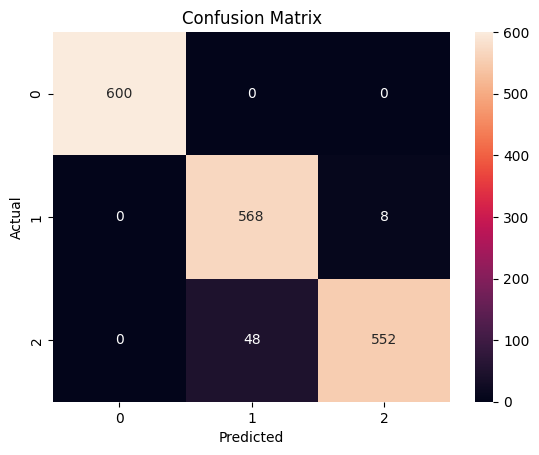

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       600
           1       0.92      0.99      0.95       576
           2       0.99      0.92      0.95       600

    accuracy                           0.97      1776
   macro avg       0.97      0.97      0.97      1776
weighted avg       0.97      0.97      0.97      1776



In [19]:
model.save("lstm_sentiment_model.keras")

In [20]:
import pickle

with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)



In [21]:
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=100)
    prediction = model.predict(padded)

    print(prediction)    

    label = np.argmax(prediction)
    return label


In [22]:
predict_sentiment("realli like nice fleec zipper jacket front not terribl thick great cool night great layer true size")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[1.0722001e-09 1.6660846e-07 9.9999988e-01]]


np.int64(2)